## GReaT Example with Iris Dataset

In [1]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import numpy as np
import pandas as pd
import logging

In [3]:
from examples.utils import set_logging_level
from be_great import GReaT

/data/guoquanjiang/envs/begreat/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import matplotlib.pyplot as plt

In [5]:
logger = set_logging_level(logging.INFO)
data = pd.read_csv('C:/Users/Windows 11/Desktop/Dissertation/Codes/Data/Games/SkillCraft1_Dataset.csv')
data=data.sample(n=1000)
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
2728,7611,5,20,8,500,185.8890,0.013836,0.000539,6,0.000012,0.000809,0.003873,29.9048,45.6203,5.4430,27,0.000931,7,0.000000,0.000221
637,1824,6,21,10,800,152.8692,0.009566,0.000568,5,0.000092,0.000553,0.003562,38.0779,57.1034,5.4224,15,0.000584,6,0.000000,0.000061
2112,5943,5,21,10,730,85.9692,0.006196,0.000135,2,0.000054,0.000391,0.003044,42.6489,88.3540,3.3097,18,0.000674,6,0.000054,0.000081
219,664,5,28,8,500,72.8160,0.000284,0.000124,0,0.000213,0.000036,0.003129,22.6514,63.2045,4.2955,13,0.000942,3,0.000000,0.000000
3058,8491,4,21,16,300,116.7840,0.002995,0.000087,5,0.000000,0.000561,0.003620,39.6149,61.4672,5.0349,23,0.000593,7,0.000166,0.000040


### Create GReaT Model

In [7]:
# great = GReaT("/data/guoquanjiang/llm_ner/llama3-8b/LLM-Research/Meta-Llama-3-8B",                  # Name of the large language model used (see HuggingFace for more options)
#               epochs=10,                   # Number of epochs to train
#               save_steps=2000,               # Save model weights every x steps
#               logging_steps=500,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_travel", # Name of the directory where all intermediate steps are saved
#               batch_size=16,                 # Batch Size
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               #learning_rate=5e-5            # Set the inital learning rate
#               efficient_finetuning="lora"
#              )
great = GReaT("C:/Users/Windows 11/Desktop/Dissertation/Codes/models/iiBcai/gpt2",                  # Name of the large language model used (see HuggingFace for more options)
              epochs=10,                   # Number of epochs to train
              save_steps=2000,               # Save model weights every x steps
              logging_steps=100,             # Log the loss and learning rate every x steps
              experiment_dir="trainer_chess_game", # Name of the directory where all intermediate steps are saved
              batch_size=32                # Batch Size
              #lr_scheduler_type="constant", # Specify the learning rate scheduler 
              #learning_rate=5e-5            # Set the inital learning rate
            #   efficient_finetuning="lora"
             )

### Start Training

In [8]:
trainer = great.fit(data)

2024-06-29 18:24:13,574 - INFO - Convert data into HuggingFace dataset object... (great.py:172)
2024-06-29 18:24:13,593 - INFO - Create GReaT Trainer... (great.py:177)
2024-06-29 18:24:14,415 - INFO - Start training... (great.py:193)
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
100,1.694000
200,1.371000
300,1.339100


In [9]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 259.9306,
 'train_samples_per_second': 38.472,
 'train_steps_per_second': 1.231,
 'total_flos': 1028776135680000.0,
 'train_loss': 1.459480309486389,
 'epoch': 10.0,
 'step': 320}

In [10]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

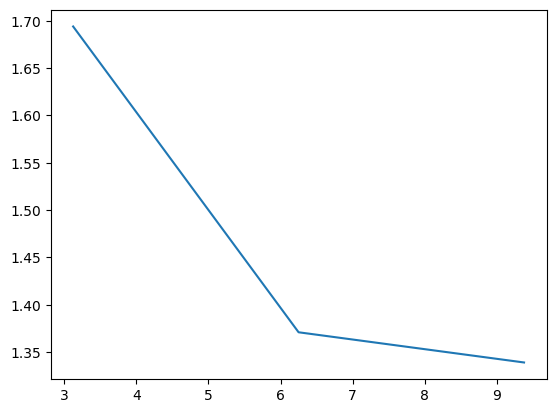

In [11]:
plt.plot(epochs, loss)

### Generate Samples

In [12]:
n_samples = 1000

In [13]:
samples = great.sample(n_samples, k=50, max_length=200)

100%|██████████| 1000/1000 [15:22<00:00,  1.08it/s]


In [14]:
samples.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5458.0,5.0,18,6,500,117.0708,0.016716,0.000637,7.0,0.000155,0.000723,0.003413,38.6000,78.4236,4.9762,24.0,0.001311,7.0,0.000131,0.00009
1,3398.0,4.0,23,8,300,71.9080,0.004413,0.000552,4.0,0.000000,0.000303,0.002835,34.7992,71.9105,6.8293,29.0,0.000712,7.0,0.000230,0.00001
2,6046.0,5.0,21,24,750,74.2912,0.001498,0.001769,1.0,0.000011,0.000367,0.003668,62.7885,59.3412,4.5958,25.0,0.000678,7.0,0.000000,0.00000
3,2921.0,4.0,21,30,2200,147.5272,0.003636,0.000428,3.0,0.000373,0.000364,0.004975,20.7288,76.5874,4.4236,28.0,0.002389,8.0,0.000288,0.00075
4,7265.0,6.0,24,4,300,108.1668,0.000339,0.000586,3.0,0.000000,0.000596,0.003578,32.4846,65.2318,3.7111,8.0,0.000000,4.0,0.000154,0.00000


In [15]:
samples.to_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/Games/skillcraft_samples.csv",index=False)

: 

## Plot Data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
670,30,No,Low Income,1,No,Yes,0
211,29,No,Low Income,2,No,No,0
821,37,Yes,High Income,1,No,No,0
410,30,No,Middle Income,3,No,Yes,0
255,37,No,Middle Income,6,No,Yes,0


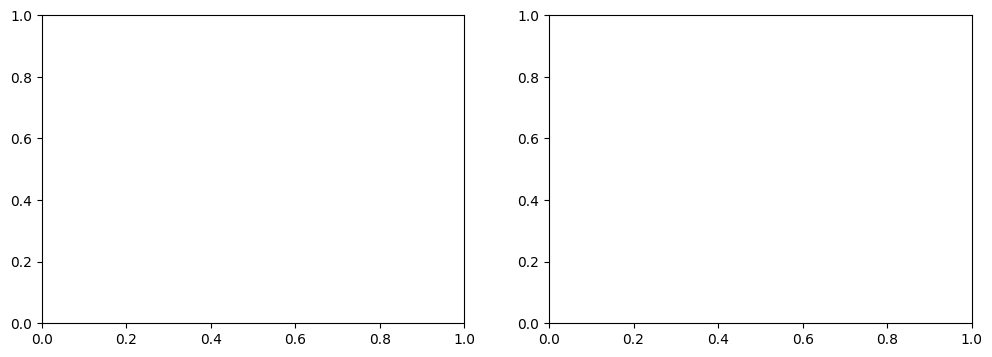

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 100)
true_samples.head()

Original Data

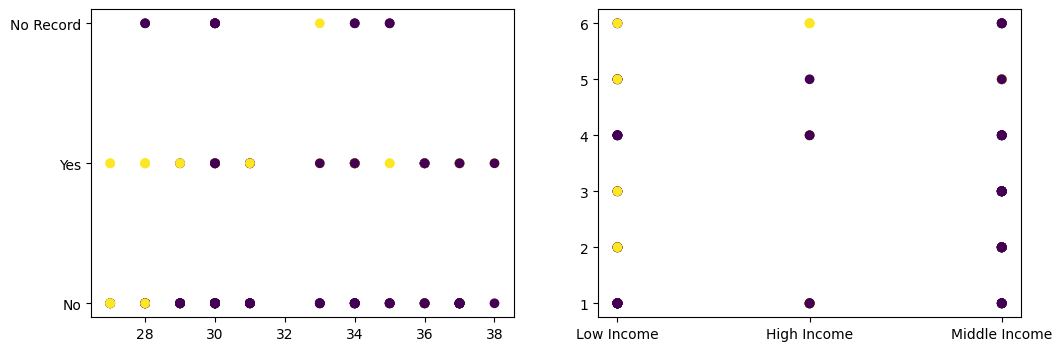

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 200)
ax[0].scatter(true_samples["Age"], true_samples["FrequentFlyer"], c=true_samples["Target"])
ax[1].scatter(true_samples["AnnualIncomeClass"], true_samples["ServicesOpted"], c=true_samples["Target"])

Generated samples

In [28]:
samples = pd.read_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/travel_samples.csv")

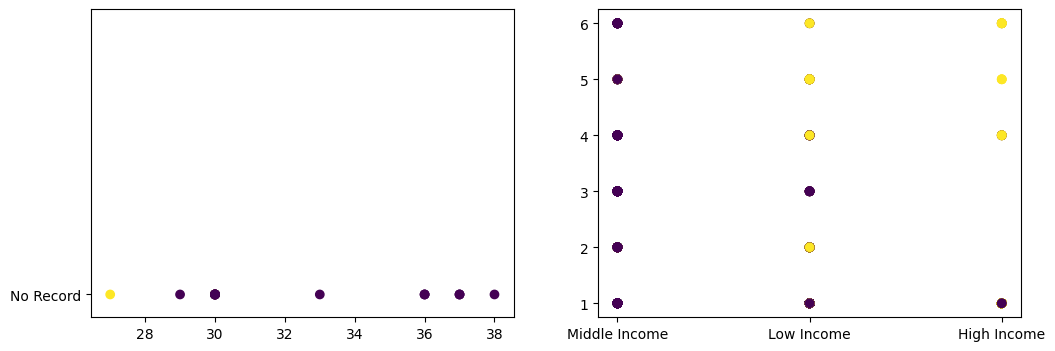

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["Age"], samples["FrequentFlyer"], c=samples["Target"])
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["AnnualIncomeClass"], samples["ServicesOpted"], c=samples["Target"].astype("int"))
